# Jensen's Alpha

### CFA for a day

The CFA exams are hard to crack. There's no need to take them if you already know where to invest your money. Together, you and I will create a quick portfolio, and then measure how it does and how its performance reflects onto you.

### Our Portfolio

Let's construct a portfolio that is simple to understand. That means there is only one share of every security. You're a junior in college, going to a big state school, and your portfolio will reflect that. You use Netflix to watch shows, Chegg to cheat on your homework, and Starbucks to keep you awake. More and more of your shopping is done at Target so that seems like a good investment. On Wednesday, Thursday, Friday, and Saturday, you go out and black out so your portfolio will embody this with Budlight and a sprinkle of a volatility futures. No one is really that special. There are 40,000 people at your state school and the US has 50 states, therefore a lot of other students like you do the same thing. So there is our portfolio: Chegg, Starbucks, Netflix, Target, Budlight, and a VIX futures ETF. 

How do we know if our portfolio is good? If our portfolio beats the market, that must mean it is good. But is it doing better than the market always? Does it just follow it closely, sometimes above, sometimes below?

### Jensen's Alpha

Jensen's Alpha, Jensen's Measure, Alpha, Jensen's Performance Index, this measure comes in many different names but they all mean the same thing. 

> The goal of this measure is to illustrate the return of the portfolio that is unexplained by the expected return. 

That is a loaded statement, but when split into chunks it gets to the purpose of this index. In theory, if you believe the efficient market hypothesis, stock prices reflect all public information available, and to perform better than the market consistently, an investor must be operating on non-public information or be inherently riskier. This means there are no market inefficiencies to exploit like Billy Bean. To reference our statement in the block, this is the *expected return*, for now. However, sometimes a risk-adjusted portfolio's returns to beat the market. Theoretically, this should not be the case so something else is at play. That something else is our Jensen's alpha. Active fund managers will call this **skill**, old-school investors would call this **luck**, and your mom would call it a **whose-a-whats-it**. Different strokes for different folks. The point is that excess return should not be there, and we do not know why it is there; we just only know it is there and it has to be measured.

### The Equation

Our equation has a nice flow and only has one statistically derived variable. $ \beta _{i,M} $ is just called beta typically in finance. It is a measure of risk, by focusing on how the market and the portfolio move together. The equation uses the beta of our portfolio on the return of the market against the risk-free rate, to effectively say how well did the market do given our portfolio's level of volatility. So the whole recipe is: 

$$ \alpha = R_i - (R_f + \beta_{i,M}(R_M - R_f)) $$

You can see from the equation where this idea of unexplained returns originates. We know how our portfolio did, that's subscript i, and we know how the market performed against the risk-free rate, adjusted for how volatile our own portfolio is. Therefore, the difference is unexplained. If that difference is positive, you are a really good hedge fund manager. If that difference is negative, the market makers are conspiring against you, that has to be the reason.

### Setup

Below here we load in our data taken monthly from the past year, as well as any libraries we will need. Then we will define the risk-free rate as 1.9%, which is near what the T-bill has been hovering around. From there, we will calculate the return of the market and our portfolio from month to month.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
path = "C:\\\\Users\\\AnthonyS/DS Stuff/Mathematical Foundation Notebooks/Jensen's Alpha"
portfolio = pd.read_csv(path + "/portfolio.csv")
benchmark = pd.read_csv(path + "/benchmark.csv")
%matplotlib inline
style.use('ggplot')

In [11]:
rfr = 0.0190
portfolio['mv'] = portfolio.sum(axis = 1)
portfolio['return'] = portfolio['mv'].pct_change()
portfolio.fillna(0)

,chgg,sbux,bud,nflx,tgt,uvxy,mv,return
0,32.380001,53.529999,91.959999,363.600006,88.949997,42.450001,672.870003,0.000000
1,27.680000,55.889999,87.059998,363.649994,84.839996,39.040001,658.159988,-0.021862
2,26.639999,64.480003,75.970001,315.440002,85.349998,57.150002,625.030005,-0.050337
3,28.820000,67.500000,75.879997,290.299988,72.339996,47.799999,582.639980,-0.067821
4,28.490000,64.320000,65.910004,267.660004,66.440002,77.919998,570.740008,-0.020424
5,35.400002,68.110001,76.839996,339.850006,71.169998,52.029999,643.400002,0.127308
6,40.419998,70.849998,81.959999,357.320007,72.940002,40.880001,664.370005,0.032592
7,37.750000,73.959999,83.639999,366.959991,79.970001,37.849998,680.129988,0.023722
8,34.740002,77.519997,87.809998,378.809998,75.669998,33.590000,688.139993,0.011777
9,35.950001,76.220001,82.279999,336.630005,82.949997,40.560001,654.590004,-0.048755


In [12]:
benchmark['return'] = benchmark['sp500'].pct_change()
benchmark.fillna(0)

,sp500,return
0,2896.719971,0.000000
1,2901.610107,0.001688
2,2738.310059,-0.056279
3,2790.370117,0.019012
4,2510.030029,-0.100467
5,2706.530029,0.078286
6,2803.689941,0.035898
7,2867.189941,0.022649
8,2923.729980,0.019720
9,2744.449951,-0.061319


In [13]:
#beta calculation
beta = (portfolio['return'].cov(benchmark['return'])) / benchmark['return'].var()
print (beta)

0.763719685769265


Right above this we calculate our beta. Our beta is 0.7637. When your beta is below 1, your portfolio is less volatile than the market. This is the opposite if your beta is above 1.

In [14]:
jensen = pd.DataFrame()
jensen['alpha'] = portfolio['return'] - (rfr + beta * benchmark['return'].subtract(rfr))

In [15]:
jensen.fillna(0)

,alpha
0,0.000000
1,-0.027640
2,-0.011845
3,-0.086830
4,0.051815
5,0.063031
6,0.000687
7,0.001935
8,-0.007772
9,-0.006413


In [16]:
plot_df = pd.DataFrame()
plot_df['\$TONY'] = portfolio['return']
plot_df['Market'] = benchmark['return']

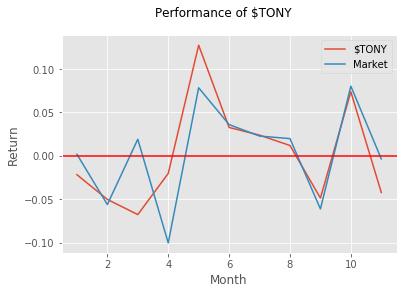

In [17]:
fig = plt.figure()
fig.suptitle('Performance of \$TONY')
plt.plot(plot_df['\$TONY'], label = '\$TONY')
plt.plot(plot_df['Market'], label = 'Market')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('Month')
plt.ylabel('Return')
plt.legend()
plt.show()

### Performance

As you can see our portfolio performs relatively closely to the market. Not bad for just picking securities that embodied your college life.

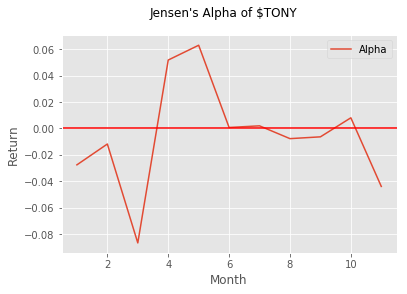

In [18]:
fig = plt.figure()
fig.suptitle('Jensen\'s Alpha of \$TONY')
plt.plot(jensen['alpha'], label = 'Alpha')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('Month')
plt.ylabel('Return')
plt.legend()
plt.show()

### Conclusion

Above is our alpha plotted out. You will notice that it follows roughly the same path as our portfolio against the market. That makes perfect sense, since our equation is meant to describe the difference between the two. We can learn a lot from this graph. For instance, we had a positive alpha from our skill of picking securities that thrive during the school semesters. You and me and Wall Street can disregard the first negative part of the because that was during the Great Winter and December Recession of 2018, which was not caused by investors misvaluing securities or companies performing poorly. It was actually caused by algorithms, and that's out of our hands. Good for us for staying solvent during that. The rest of the time we have been up, performing well, choosing skillfully, the only negatives were during trade war tweets. 

More importantly, this is an illustrated version of a fundamental measure of your portfolio. We can build on this and make it more complex by adding and subtracting securities at specific points in time by timing the market. Our portfolio could be bolstered by bonds, or derivatives that offer better returns than just securities. The sky is the limit bud.